### Imports and Configs

In [1]:
# The usual preamble
%matplotlib inline
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
# pd.set_option('display.mpl_style', 'default')
plt.style.use('ggplot')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [9]:
# This assigns the coffeeshops data to a dataframe object that maps to the "df" variable
df = pd.read_csv("coffeeshops.csv")
df = df.drop_duplicates()

### Let's Work with the Data
It's always best to have an idea of what the dataset is. This dataset was scraped from Foursquare's location data on all coffeeshops within NCR.

In [11]:
# Run df.head() or df.head(n) where n is an integer mapping to the number of lines you want displayed.
# Just running df would display a large summarized version of the DataFrame
df.head(5)

,id,name,lat,lng,checkins,address
0,4b78d398f964a520cee32ee3,Starbucks Coffee,14.734710,121.057599,10428,"Ground Flr, SM City Fairview (Annex 1)"
1,53055beb498e87041e7204f9,Starbucks Coffee,14.735735,121.060213,3793,"Fairview Terraces, Quirino Hwy"
2,4bc1f1a6f8219c74a0f7b310,The Coffee Bean & Tea Leaf,14.736308,121.058135,17441,"G/F Gateway Mall, Gen Roxas Ave"
3,4e5b077352b1b78b81b213b9,Starbucks Coffee,14.734639,121.059474,4116,"2nd Flr, SM City Fairview (Main Bldg)"
4,4ceb3522e888f04d2161516b,Starbucks Coffee,14.553593,121.050662,40149,"Crossroads, Bonifacio Global City"


### Selecting Columns and Rows
To select a column, we index it with the name of the column and but it in double brackets, like this:

In [12]:
df[["name"]][:5]

,name
0,Starbucks Coffee
1,Starbucks Coffee
2,The Coffee Bean & Tea Leaf
3,Starbucks Coffee
4,Starbucks Coffee


If you want to work with more columns, just include them in the list.

In [6]:
df[["name", "lat", "lng"]][:10]

,name,lat,lng
0,Starbucks Coffee,14.734710,121.057599
1,Starbucks Coffee,14.735735,121.060213
2,The Coffee Bean & Tea Leaf,14.736308,121.058135
3,Starbucks Coffee,14.734639,121.059474
4,Starbucks Coffee,14.553593,121.050662
5,Seattle's Best Coffee,14.737156,121.059300
6,Starbucks Coffee,14.552860,121.025119
7,Starbucks Coffee,14.680479,121.031785
8,Starbucks Coffee,14.630510,121.034510
9,Starbucks Coffee,14.574494,121.062474


### Basic Descriptives
Okay we've dealt with the access and manipulation of dataframes. Now we get on with the exciting part of getting actual information from our data.

#### Coffeeshops with the most branches?
Pandas makes this easy to answer with the value_counts() command. It sort of works like a `GROUP BY COUNT` SQL query.

In [14]:
df['name'].value_counts()[:5]

Starbucks Coffee              151
The Coffee Bean & Tea Leaf     31
Seattle's Best Coffee          15
Bo's Coffee                     7
UCC Vienna Café                 6
Name: name, dtype: int64

We can plot it out to make more sense of the data using Pandas built-in binding with Matplotlib. 

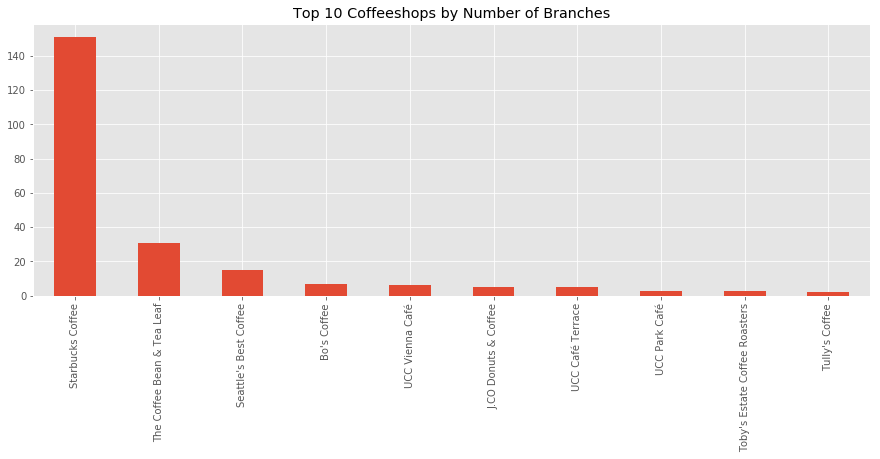

In [15]:
df['name'].value_counts()[:10].plot(kind='bar', title ="Top 10 Coffeeshops by Number of Branches")

#### Average Number of Checkins per Coffee Chain?
Pandas allows us to do this using the groupby function.

In [20]:
df['checkins'].groupby(df['name']).mean()


name
55Square Cafe                                      14.000000
Ala Eh! Cafe Amadeo                               848.000000
Alamid Cafe Xpress (inside ROX)                    30.000000
Allegro Cafe Italiano                             112.000000
Baang Coffee                                     4284.000000
Bean Belt Coffee Shop                             212.000000
Beanleaf Coffee, Tea And Sausage-Ubelt-Loyola     324.000000
Bellini's Cafe and Restaurant                     542.000000
Black Canyon Coffee                               338.000000
Blenz Coffee                                     5711.000000
Bo's Coffee                                      3495.428571
Book & Borders Café                              1111.000000
Bueno Cafe                                          2.000000
CAFÉ+ Coffee.Brunch.Dessert                      3054.000000
CRAFT Coffee Revolution                          1262.000000
Cafe Agnes                                        117.000000
Cafe Alezon        

Let's plot it out again.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


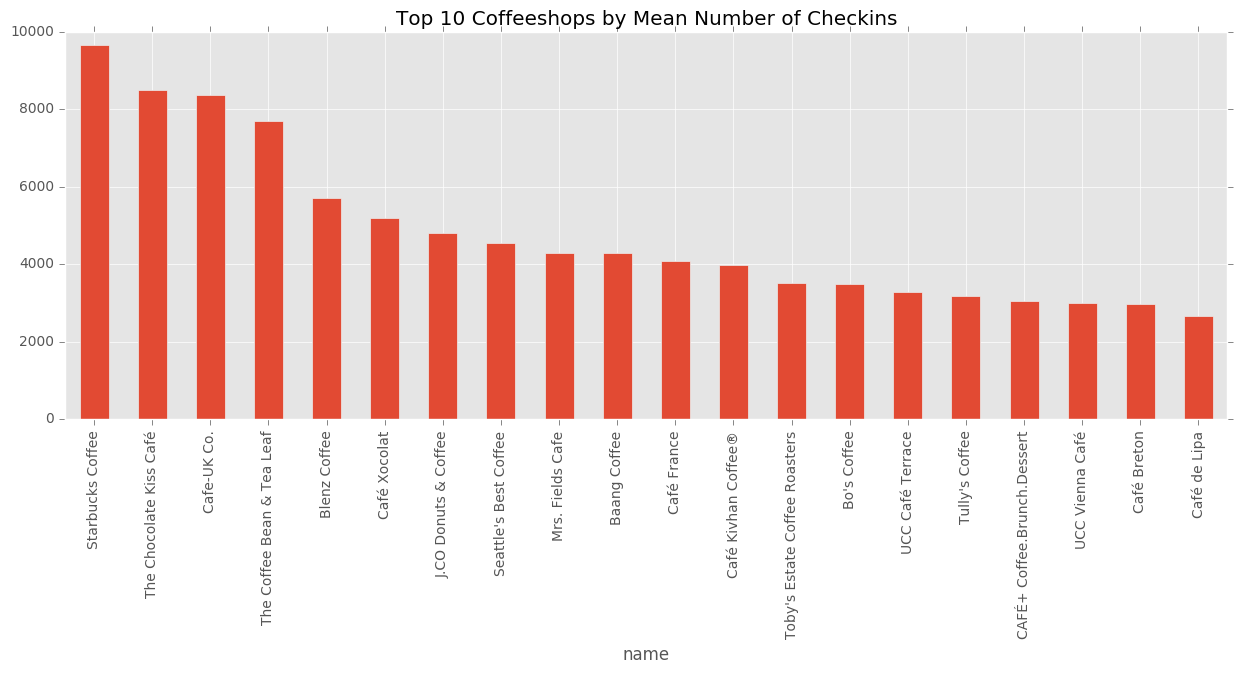

In [11]:
df['checkins'].groupby(df['name']).mean().order(ascending=False)[:20].plot(kind='bar',\
                                                                           title ="Top 10 Coffeeshops by Mean Number of Checkins")

### Plotting the Data
We have coordinate data! Why don't we plot them out? Pandas is able to do this with the help of a mapping library called Folium.
Here's a code snippet that uses the CartoDB Dark Matter basemap.

In [12]:
basemap = folium.Map(location=[14.5562297,121.0204097], height=1000, width=1000, tiles="cartodbdark_matter", zoom_start=15)
for index, row in df.iterrows():
    basemap.circle_marker(location=[row["lat"], row["lng"]], radius=20,
                    popup=row["name"], line_color='#FFDB51', fill_color='#FFDB51')
basemap.save('coffee_shops_dark.html')
basemap

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: circle_marker is deprecated. Use add_children(CircleMarker) instead


Let's try a heatmap to see where coffeeshops are clustered the most.

In [16]:
map_osm = folium.Map([14.6091, 121.0223], zoom_start=11, tiles='cartodbpositron')
map_osm.add_children(plugins.HeatMap(zip(df["lat"], df["lng"]), radius = 15))
map_osm

An alternative way of visualizing this might be to create a cluster map of the coffeeshop locations.

In [17]:
from folium.plugins import MarkerCluster # for marker clusters

# initialize map
map_osm_cluster = folium.Map([14.6091, 121.0223], zoom_start=13, tiles='cartodbpositron')

# Organize data
latlng = df[['lat', 'lng']]
coordinates = [tuple(x) for x in latlng.values]

# add marker clusters
map_osm_cluster.add_children(MarkerCluster(locations=coordinates, popups=df["name"]))
map_osm_cluster.save('coffee_cluster.html')

map_osm_cluster

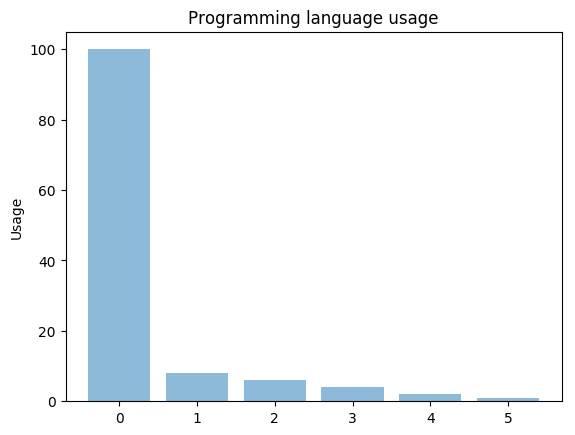

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('0', '1', '2', '3', '4', '5')
y_pos = np.arange(len(objects))
performance = [100,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
plt.show()

In [22]:
def plot(a):
    objects = ('0', '1', '2', '3', '4', '5')
    y_pos = np.arange(len(objects))
    performance = a
    plt.cla()
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Usage')
    plt.title('Programming language usage')
    plt.show()
    

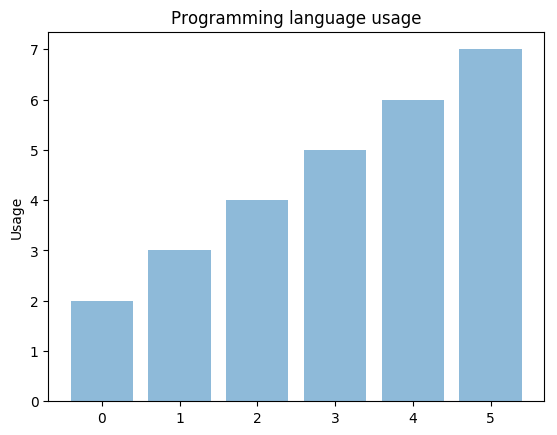

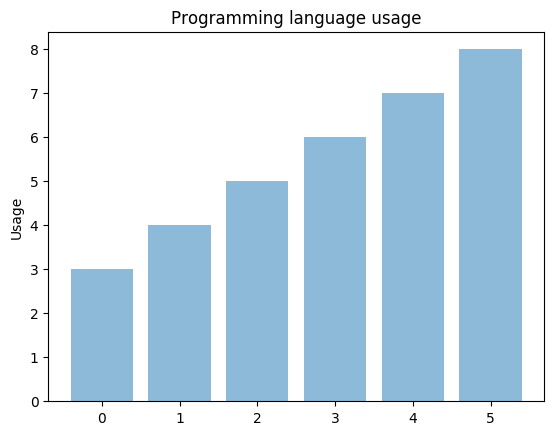

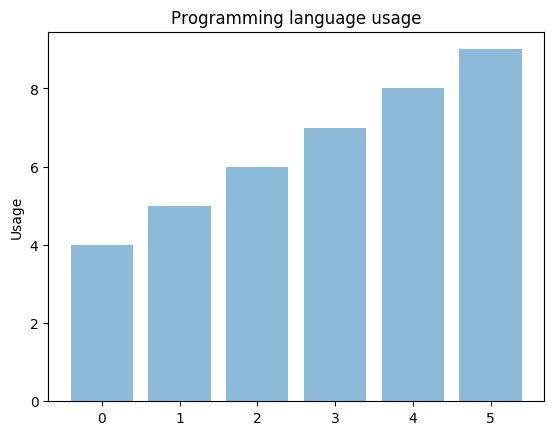

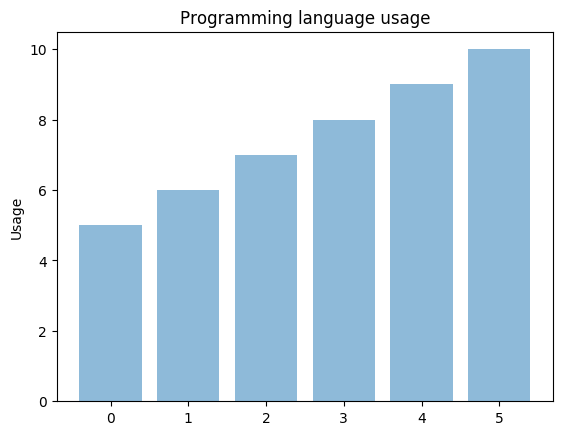

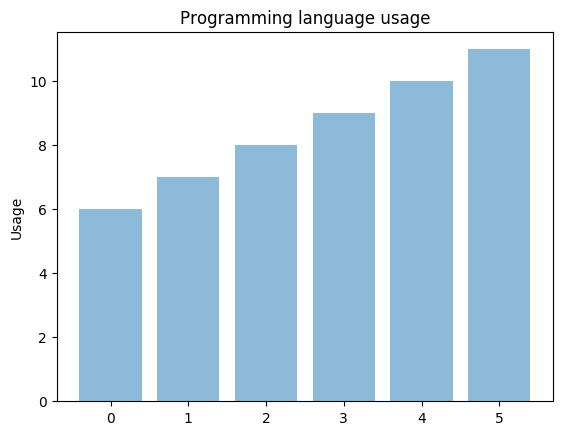

In [23]:
a = [1,2,3,4,5,6]
for x in range(5):
    a = [j + 1 for j in a]
    plot(a)